In [1]:
import os
import pybullet as p
import pybullet_data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p.connect(p.GUI)

0

In [84]:
p.resetDebugVisualizerCamera(cameraDistance=10, cameraYaw=0, cameraPitch=-40, cameraTargetPosition=[0.55,-0.35,0.2])
urdfRootPath = pybullet_data.getDataPath()
planeUid = p.loadURDF(os.path.join(urdfRootPath,"plane.urdf"), basePosition=[0,0,0])
pid = p.loadURDF(os.path.join(urdfRootPath, "bicycle/bike.urdf"),basePosition=[0,0,1])

In [85]:
p.setGravity(0,0,-10)

In [11]:
print("base (or root link) of the body : position , orientation",p.getBasePositionAndOrientation(pid))

base (or root link) of the body : position , orientation ((0.0, 0.0, 1.0), (0.706825181105366, 0.0, 0.0, 0.7073882691671998))


In [12]:
print("roll around X, pitch around Y, yaw around Z", p.getEulerFromQuaternion(p.getBasePositionAndOrientation(pid)[1]))

roll around X, pitch around Y, yaw around Z (1.57, -0.0, 0.0)


In [13]:
print("joint info = ",p.getJointInfo(pid,1)) # JOINT_REVOLUTE

joint info =  (1, b'handlebar_to_frontwheel', 0, 8, 7, 1, 0.0, 0.0, 0.0, -1.0, 100.0, 100.0, b'frontWheelLink', (0.0, 0.0007963267107333194, -0.9999996829318347), (0.07, 0.0, -0.69), (-0.706825181105366, 0.0, 0.0, 0.7073882691671998), 0)


In [14]:
i = 0
print("jointLowerLimit",p.getJointInfo(pid,i)[8])
print("jointUpperLimit",p.getJointInfo(pid,i)[9]) # Values ignored in case upper limit <lower limit.
print("jointMaxForce",p.getJointInfo(pid,i)[10]) #that this value is not automatically used. 
                                                 #You can use maxForce in 'setJointMotorControl2
print("jointMaxVelocity",p.getJointInfo(pid,i)[11]) #Note that the maximum velocity is not used in 
                                                    #actual motor control commands at the moment



jointLowerLimit 0.0
jointUpperLimit -1.0
jointMaxForce 100.0
jointMaxVelocity 100.0


Important Note: by default, each revolute joint and prismatic joint is motorized using a velocity motor. You can disable those default motor by using a maximum force of 0. This will let you perform torque control. 
For example:

maxForce = 0<br>
p.setJointMotorControl2(objUid, jointIndex=0, p.VELOCITY_CONTROL, force=maxForce)<br>
You can also use a small non-zero force to mimic joint friction.

If you want a wheel to maintain a constant velocity, with a max force you can use:

maxForce = 500 <br>
p.setJointMotorControl2(objUid, 
jointIndex=0, 
p.VELOCITY_CONTROL,
targetVelocity = targetVel,
force = maxForce)

In [30]:
#p.configureDebugVisualizer(p.COV_ENABLE_SINGLE_STEP_RENDERING)

In [13]:
import keyboard
up_pressed = False
down_pressed = False
left_pressed = False
right_pressed = False

joint = 0
force = 10
velocity = 10

for _ in range(100000):

    if keyboard.is_pressed('up'):
        if not up_pressed:
            p.setJointMotorControl2(pid, joint, p.VELOCITY_CONTROL, velocity, force=force)
            force += 1
            up_pressed = True
            print(p.getJointState(pid,joint))
    else:
        up_pressed = False

    if keyboard.is_pressed('down'):
        if not down_pressed:
            p.setJointMotorControl2(pid, joint, p.VELOCITY_CONTROL, velocity, force=force)
            force -= 1
            down_pressed = True
            print(p.getJointState(pid,joint))
    else:
        down_pressed = False  

    if keyboard.is_pressed('right'):
        if not right_pressed:
            p.setJointMotorControl2(pid, joint, p.VELOCITY_CONTROL, velocity, force=force)
            velocity += 1
            right_pressed = True
            print(p.getJointState(pid,joint))
    else:
        right_pressed = False

    if keyboard.is_pressed('left'):
        if not left_pressed:
            p.setJointMotorControl2(pid, joint, p.VELOCITY_CONTROL, velocity, force=force)
            velocity -= 1
            left_pressed = True
            print(p.getJointState(pid,joint))
    else:
        left_pressed = False    

    if keyboard.is_pressed('esc'):
        break
    p.stepSimulation()

(-0.004778756586274094, -0.0002579396522678024, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5204518202839656)
(-0.005523831963548726, -0.0002596230571693552, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5320119957505467)
(-0.006022524470726713, -0.0002607501430077805, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5397589530384583)
(-0.0065856689048802534, -0.00026445020748024295, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5462863731739818)
(-0.007490365465142331, -0.00026637135207748777, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5603665885630162)
(-0.00811226582119978, -0.00026763845457692775, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.5700355655729705)
(-0.008940607205430919, -0.0002709052316199919, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.583580311463622)
(-0.009538089767904375, -0.00023974660277593148, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.59313760403196)
(-0.009926300040301981, -0.00025942143455441044, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2.599350793115956)


In [543]:
p.setJointMotorControl2(pid, 0, p.VELOCITY_CONTROL, targetVelocity=1, force=1)

In [581]:
p.setJointMotorControl2(pid, 1, p.VELOCITY_CONTROL, targetVelocity=10, force=50)

In [582]:
p.setJointMotorControl2(pid, 2, p.VELOCITY_CONTROL, targetVelocity=10, force=50)

In [87]:
p.setRealTimeSimulation(0)
p.setJointMotorControl2(pid, 2, p.VELOCITY_CONTROL, targetVelocity=5, force=3)
p.setJointMotorControl2(pid, 1, p.VELOCITY_CONTROL, targetVelocity=5, force=3)

In [70]:
for i in range(100000):
    if(i%100):
        p.setJointMotorControl2(pid, 2, p.VELOCITY_CONTROL, targetVelocity=5, force=0.1)
        p.setJointMotorControl2(pid, 1, p.VELOCITY_CONTROL, targetVelocity=5, force=0.1)
    #p.stepSimulation()    

In [83]:
p.resetSimulation()

In [200]:
p.disconnect()

In [18]:
p.getJointInfo(pid,0)

(0,
 b'frame_to_handlebar',
 0,
 7,
 6,
 1,
 0.0,
 0.0,
 0.0,
 -1.0,
 100.0,
 100.0,
 b'handlebarLink',
 (0.0, 0.0, 1.0),
 (0.7, 0.21999993024500364, 0.00017519187636131806),
 (0.700778193696528,
  0.09233269719552732,
  -0.0922591994549316,
  0.7013364644619341),
 -1)

In [19]:
p.getJointState(pid,0)

(-0.0006703958528976332,
 -0.0002536106262619303,
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 2.4509049303278014)

In [58]:
p.JOINT_REVOLUTE

0

In [560]:
view_matrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0.7,0,0.05],
                                                            distance=.7,
                                                            yaw=90,
                                                            pitch=-70,
                                                            roll=0,
                                                            upAxisIndex=2)

In [561]:
proj_matrix = p.computeProjectionMatrixFOV(fov=60,
                                                     aspect=float(960) /720,
                                                     nearVal=0.1,
                                                     farVal=100.0)

In [563]:
(_, _, px, _, _) = p.getCameraImage(width=960,
                                              height=720,
                                              viewMatrix=view_matrix,
                                              projectionMatrix=proj_matrix,
                                              renderer=p.ER_BULLET_HARDWARE_OPENGL)

In [566]:
rgb_array = np.array(px, dtype=np.uint8)

In [567]:
rgb_array = np.reshape(rgb_array, (720,960, 4))

In [568]:
rgb_array = rgb_array[:, :, :3]

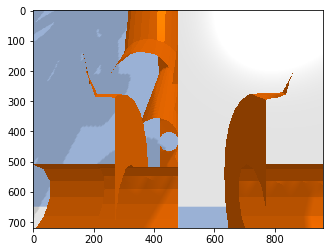

In [569]:
plt.imshow(rgb_array)

In [605]:
p.getLinkState(pid,4)